# Tipos de Gráficos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
%matplotlib inline
%config IPCompleter.greedy=True

In [2]:
data=pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [3]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


### Scatter Plot

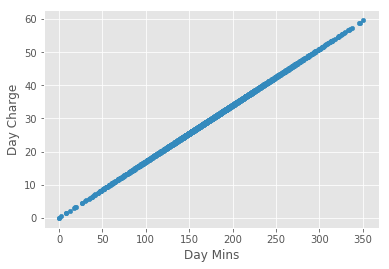

In [4]:
data.plot(kind="scatter", x= "Day Mins",y="Day Charge")
plt.savefig("../Theory/Foto.png")
plt.show()

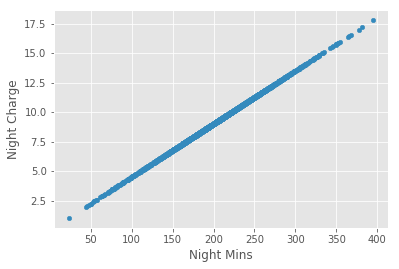

In [5]:
data.plot(kind="scatter", x="Night Mins" ,y="Night Charge")
plt.show()

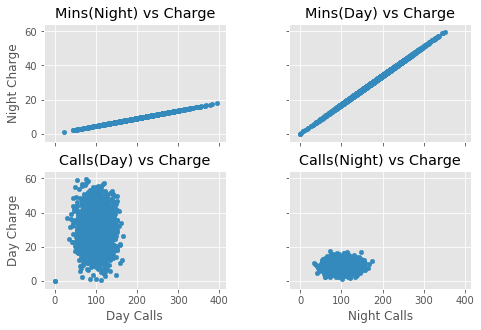

In [6]:
figure,axs= plt.subplots(2,2, sharey=True, sharex=True)
data.plot(kind="scatter", x='Night Mins', y='Night Charge', ax=axs[0][0])
axs[0,0].set_title("Mins(Night) vs Charge")
data.plot(kind="scatter", x='Day Mins', y='Day Charge', ax=axs[0][1])
axs[0,1].set_title("Mins(Day) vs Charge")
data.plot(kind="scatter", x='Day Calls', y='Day Charge', ax=axs[1][0])
axs[1,0].set_title("Calls(Day) vs Charge")
data.plot(kind="scatter", x='Night Calls', y='Night Charge', ax=axs[1][1])
axs[1,1].set_title("Calls(Night) vs Charge")
# Acomodar gráficos para que no se sobrepongan
plt.subplots_adjust(top=0.92,bottom=0.00,left=0.001,right=0.99,hspace=0.25,wspace=0.35) # Para espaciar y no se sobrepongan
plt.show()

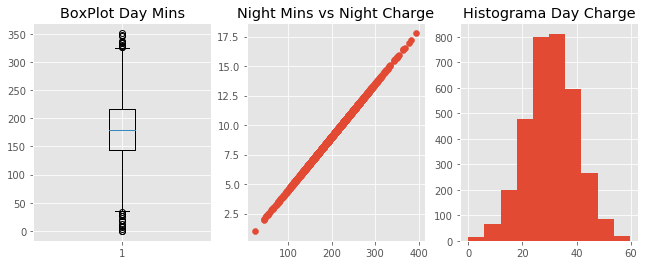

In [7]:
# Otra manera de Hacerlo
figure,(ax,ax1,ax2)= plt.subplots(1,3, sharey=False, sharex=False)
ax1.scatter(data=data, x='Night Mins', y='Night Charge')
ax1.set_title("Night Mins vs Night Charge")
ax2.hist(data['Day Charge'])
ax2.set_title("Histograma Day Charge")
ax.boxplot(data["Day Mins"])
ax.set_title("BoxPlot Day Mins")
plt.subplots_adjust(left=0.0,right=1.4)
plt.show()

### Histogramas de Frecuencia

#### Determinar el número de clases mediante la regla de Sturges para el hist

$$Regla de Sturges, c = 1 + \log_2(M),\ donde\ M\ es\ el\ tamaño\ de\ la\ muestra$$

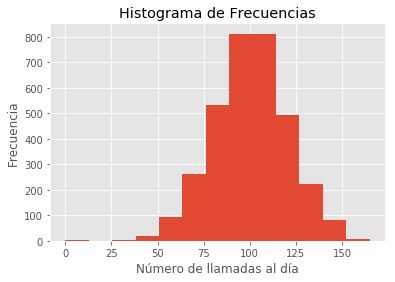

In [8]:
k = int(np.ceil(1+np.log2(data.shape[0])))
plt.hist(data["Day Calls"], bins=k)
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma de Frecuencias")
plt.show()

### Diagrama de Cajas y Bigotes

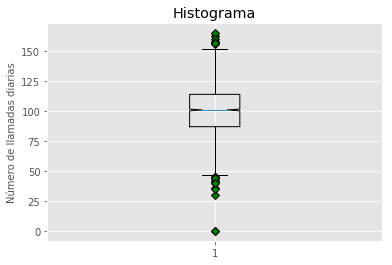

In [9]:
green_diamond ={"markerfacecolor":"g","marker":"D"}
plt.boxplot(data["Day Calls"],notch=True,flierprops=green_diamond)
plt.ylabel("Número de llamadas diarias", fontsize=10)
plt.title("Histograma")
plt.show()

### Información General del Dataset

In [10]:
data["Day Calls"].shape

(3333,)

In [11]:
type(data["Day Calls"])

pandas.core.series.Series

In [12]:
data.describe() # Información General del Dataset

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [13]:
Rango_intercuartilico = data["Day Calls"].quantile(0.75)- data["Day Calls"].quantile(0.25)

In [14]:
Rango_intercuartilico

27.0

In [15]:
bigote_inferior = data["Day Calls"].quantile(.25)-1.5*Rango_intercuartilico
bigote_inferior

46.5

In [16]:
bigote_inferior = data["Day Calls"].quantile(.75)+1.5*Rango_intercuartilico
bigote_inferior

154.5

In [17]:
data["Day Calls"].quantile() # Por defecto 0.5

101.0

In [18]:
data["Day Calls"].quantile(.5) 

101.0

In [19]:
data["Day Calls"].quantile([.1,.5])

0.1     74.2
0.5    101.0
Name: Day Calls, dtype: float64